In [14]:
import tensorflow as tf
from keras.layers import Dense, GlobalAveragePooling1D, Dropout, Input, Flatten
import numpy as np
import pandas as pd
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
# bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [2]:
df = pd.read_csv("data/covid19_articles_20201231_reduced.csv")

In [3]:
df['topic_area'] = df['topic_area'].astype('category')
df['topic_area_code'] = df['topic_area'].cat.codes

In [4]:
cat_mapping = dict(enumerate(df['topic_area'].cat.categories))

In [5]:
cat_mapping

{0: 'business',
 1: 'consumer',
 2: 'finance',
 3: 'general',
 4: 'healthcare',
 5: 'science',
 6: 'tech'}

In [6]:
X = df['content']
y = df['topic_area_code']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y)

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

In [7]:
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'


In [8]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=False, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(14, activation='sigmoid', name='hidden_layer')(net)
    net = tf.keras.layers.Dense(7, activation='softmax', name='classifier')(net)
    return tf.keras.Model(text_input, net)

In [9]:
classifier_model = build_classifier_model()

classifier_model.compile(optimizer = tf.optimizers.Adam(),
             loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
epochs = 3
classifier_model.fit(X_train, y_train, epochs=epochs)

In [10]:
hist = classifier_model.fit(
    x=X_train,
    y=y_train,
    epochs=10,
    verbose=1,
)

Epoch 1/10
1180/1180 [==============================] - 757s 639ms/step - loss: 1.4070 - accuracy: 0.4996
Epoch 2/10
1180/1180 [==============================] - 787s 667ms/step - loss: 1.1523 - accuracy: 0.5771
Epoch 3/10
1180/1180 [==============================] - 768s 651ms/step - loss: 1.0894 - accuracy: 0.5985
Epoch 4/10
1180/1180 [==============================] - 747s 633ms/step - loss: 1.0595 - accuracy: 0.6063
Epoch 5/10
1180/1180 [==============================] - 712s 604ms/step - loss: 1.0407 - accuracy: 0.6148
Epoch 6/10
1180/1180 [==============================] - 711s 603ms/step - loss: 1.0318 - accuracy: 0.6155
Epoch 7/10
1180/1180 [==============================] - 709s 601ms/step - loss: 1.0202 - accuracy: 0.6204
Epoch 8/10
1180/1180 [==============================] - 716s 607ms/step - loss: 1.0126 - accuracy: 0.6214
Epoch 9/10
1180/1180 [==============================] - 726s 615ms/step - loss: 1.0080 - accuracy: 0.6224
Epoch 10/10
1180/1180 [=======================

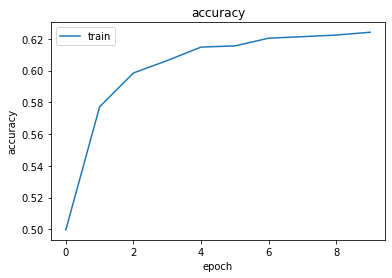

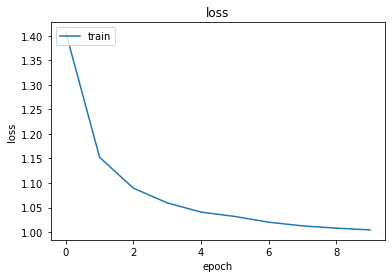

In [16]:
for x in ["accuracy", "loss"]:
    plt.plot(hist.history[x])
    plt.title(x)
    plt.ylabel(x)
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()


In [17]:
def build_classifier_model2():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=False, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(14, activation='relu', name='hidden_layer')(net)
    net = tf.keras.layers.Dense(7, activation='softmax', name='classifier')(net)
    return tf.keras.Model(text_input, net)

def build_classifier_model3():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=False, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(14, activation='tanh', name='hidden_layer')(net)
    net = tf.keras.layers.Dense(7, activation='softmax', name='classifier')(net)
    return tf.keras.Model(text_input, net)

In [18]:
classifier_model2 = build_classifier_model2()

classifier_model2.compile(optimizer = tf.optimizers.Adam(),
             loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

classifier_model3 = build_classifier_model3()

classifier_model3.compile(optimizer = tf.optimizers.Adam(),
             loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
hist = classifier_model2.fit(
    x=X_train,
    y=y_train,
    epochs=10,
    verbose=1,
)

Epoch 1/10
1180/1180 [==============================] - 753s 635ms/step - loss: 1.3319 - accuracy: 0.4785
Epoch 2/10
1180/1180 [==============================] - 756s 640ms/step - loss: 1.1109 - accuracy: 0.5817
Epoch 3/10
1180/1180 [==============================] - 739s 626ms/step - loss: 1.0740 - accuracy: 0.5963
Epoch 4/10
1180/1180 [==============================] - 756s 641ms/step - loss: 1.0583 - accuracy: 0.6033
Epoch 5/10
1180/1180 [==============================] - 756s 641ms/step - loss: 1.0456 - accuracy: 0.6074
Epoch 6/10
1180/1180 [==============================] - 755s 640ms/step - loss: 1.0385 - accuracy: 0.6111
Epoch 7/10
1180/1180 [==============================] - 756s 641ms/step - loss: 1.0289 - accuracy: 0.6153
Epoch 8/10
1180/1180 [==============================] - 754s 639ms/step - loss: 1.0274 - accuracy: 0.6148
Epoch 9/10
1180/1180 [==============================] - 732s 620ms/step - loss: 1.0231 - accuracy: 0.6163
Epoch 10/10
1180/1180 [=======================

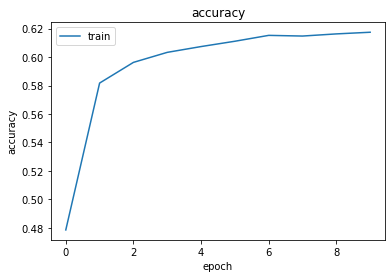

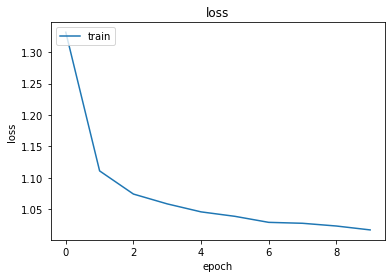

In [20]:
for x in ["accuracy", "loss"]:
    plt.plot(hist.history[x])
    plt.title(x)
    plt.ylabel(x)
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()


In [21]:
hist = classifier_model3.fit(
    x=X_train,
    y=y_train,
    epochs=10,
    verbose=1,
)

Epoch 1/10
1180/1180 [==============================] - 799s 675ms/step - loss: 1.2784 - accuracy: 0.5246
Epoch 2/10
1180/1180 [==============================] - 777s 658ms/step - loss: 1.1034 - accuracy: 0.5907
Epoch 3/10
1180/1180 [==============================] - 792s 671ms/step - loss: 1.0683 - accuracy: 0.6037
Epoch 4/10
1180/1180 [==============================] - 756s 641ms/step - loss: 1.0513 - accuracy: 0.6065
Epoch 5/10
1180/1180 [==============================] - 744s 631ms/step - loss: 1.0375 - accuracy: 0.6114
Epoch 6/10
1180/1180 [==============================] - 750s 636ms/step - loss: 1.0315 - accuracy: 0.6137
Epoch 7/10
1180/1180 [==============================] - 763s 647ms/step - loss: 1.0244 - accuracy: 0.6160
Epoch 8/10
1180/1180 [==============================] - 765s 648ms/step - loss: 1.0211 - accuracy: 0.6180
Epoch 9/10
1180/1180 [==============================] - 769s 652ms/step - loss: 1.0200 - accuracy: 0.6201
Epoch 10/10
1180/1180 [=======================

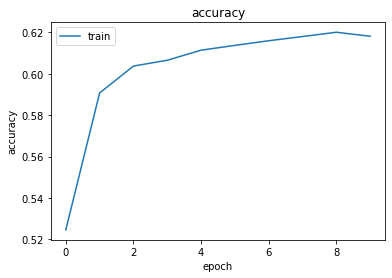

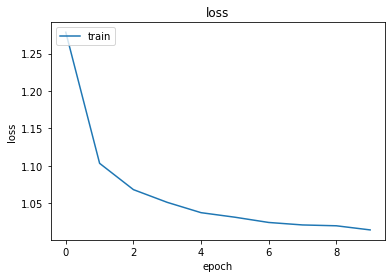

In [22]:
for x in ["accuracy", "loss"]:
    plt.plot(hist.history[x])
    plt.title(x)
    plt.ylabel(x)
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()


In [23]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)

 21/295 [=>............................] - ETA: 2:55 - loss: 1.0148 - accuracy: 0.6295

KeyboardInterrupt: 

In [24]:
from sklearn import metrics
import seaborn as sns

In [25]:
y_pred = classifier_model.predict(X_test)

In [26]:
my_list = []

In [27]:
for row in y_pred:
    my_list += [np.argmax(row)]

In [28]:
y_pred2 = np.array(my_list)

In [ ]:
y_pred2

In [29]:
accuracy = metrics.accuracy_score(y_test, y_pred2)
#roc = metrics.roc_auc_score(y_test, y_pred_prob, multi_class="ovr")
class_report = metrics.classification_report(y_test, y_pred2)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)


In [30]:
print(class_report)


              precision    recall  f1-score   support

           0       0.64      0.49      0.55      2000
           1       0.69      0.64      0.66       291
           2       0.61      0.72      0.66      2000
           3       0.72      0.68      0.70      2000
           4       0.67      0.48      0.56       268
           5       0.67      0.63      0.65       912
           6       0.59      0.71      0.64      1968

    accuracy                           0.64      9439
   macro avg       0.66      0.62      0.63      9439
weighted avg       0.65      0.64      0.64      9439



In [ ]:
sns.heatmap(
    confusion_matrix / np.sum(confusion_matrix), fmt=".2%", annot=True, cmap="Blues"
)
plt.show()


In [ ]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=False, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(14, activation='sigmoid', name='hidden_layer')(net)
    net = tf.keras.layers.Dense(7, activation='softmax', name='classifier')(net)
    return tf.keras.Model(text_input, net)

classifier_model = build_classifier_model()

classifier_model.compile(optimizer = tf.optimizers.Adam(),
             loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
epochs = 3
classifier_model.fit(X_train, y_train, epochs=epochs)

In [ ]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)

In [ ]:
y_pred[0]

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
## https://stackoverflow.com/questions/44114463/stratified-sampling-in-pandas
def stratified_sample_df(df, col, n_samples, random_state=69):
    n = min(n_samples, df[col].value_counts().min())
    df_ = df.groupby(col).apply(lambda x: x.sample(n, random_state=random_state))
    df_.index = df_.index.droplevel(0)
    return df_


In [ ]:
df = stratified_sample_df(df, "topic_area", 100)
df.info()


In [ ]:
BERT_MODEL_NAME = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(
    BERT_MODEL_NAME, truncate=True, max_length=100
)



In [ ]:
sequences = df["content"].tolist()
batch = dict(tokenizer(sequences, padding=True, truncation=True, return_tensors="tf"))

TENSOR_LENGTH = 0
for i, r in enumerate(batch["input_ids"]):
    TENSOR_LENGTH = max(len(r), TENSOR_LENGTH)
print(TENSOR_LENGTH)


In [ ]:
print(
    f"""
Sample sentence:    {df["content"].tolist()[0][:100]}...
input ids:          {batch["input_ids"][0][:100]}...
token type ids:     {batch["token_type_ids"][0][:100]}...
attention mask:     {batch["attention_mask"][0][:100]}...
"""
)


In [ ]:
topic_area_map = {k: i for k, i in enumerate(df["topic_area"].unique())}
reversed_topic_area_map = {v: k for k, v in topic_area_map.items()}
labels = tf.convert_to_tensor(
    [reversed_topic_area_map[k] for k in df["topic_area"].tolist()]
)


In [ ]:
model = TFBertForSequenceClassification.from_pretrained(
    BERT_MODEL_NAME, num_labels=len(df.topic_area.unique())
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


In [ ]:
hist = model.fit(x=batch, y=labels, batch_size=10, epochs=3, verbose=1)


In [ ]:
BERT_MODEL_FILEPATH = "saved_models/bert"
model.save(BERT_MODEL_FILEPATH)
model = tf.keras.models.load_model(BERT_MODEL_FILEPATH)


In [ ]:
test = ["this is a super test", "this is a boring article"]
batch = dict(tokenizer(test, padding=True, truncation=True, return_tensors="tf"))
y_pred = model.predict(batch)


In [ ]:
y_pred.to_tuple()[0].tolist()
